# Image Compression using PCA
#### In this project, we will be exploring the possibilities of Principal Component Analysis (PCA) for image compression. The dataset we will be looking at is from the MNIST database and comprises of hand-written digits. The dataset has 1000 images in the form of 28x28 pixels that can be represented using 784 elements. Let's get started and import our dataset.

In [16]:
# import libraries required
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import random

In [4]:
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]
x.shape, y.shape

((1000, 784), (1000,))

Let's plot a random image to see what our dataset looks like

This label below is : 9


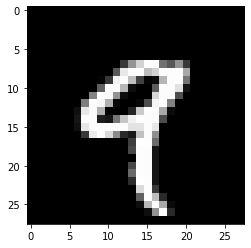

In [9]:
plt.gray() 
plt.imshow(x[4].reshape(-1,28)) 
print ("This label below is :", y[4])
plt.show() 

Lets compute the eigenvector and perform eigendecomposition on this dataset.

In [10]:
# covariance and eigendecomposition
mu = x.mean(axis=0) 
x = x - mu 
# because we are only dealing with pixels, we just subtract mean for standardization. 
# Dividing by standard deviation is not needed since all pixels have same range
C = np.cov(x.T)
eigenValues, eigenVectors = np.linalg.eig(C) 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args].real
eigenVectors = eigenVectors[:, args].real
eigenValues.shape, eigenVectors.shape

((784,), (784, 784))

Lets plot the first few eigenvectors to see the trend. These eigenvectors also represent the number of Principal Components

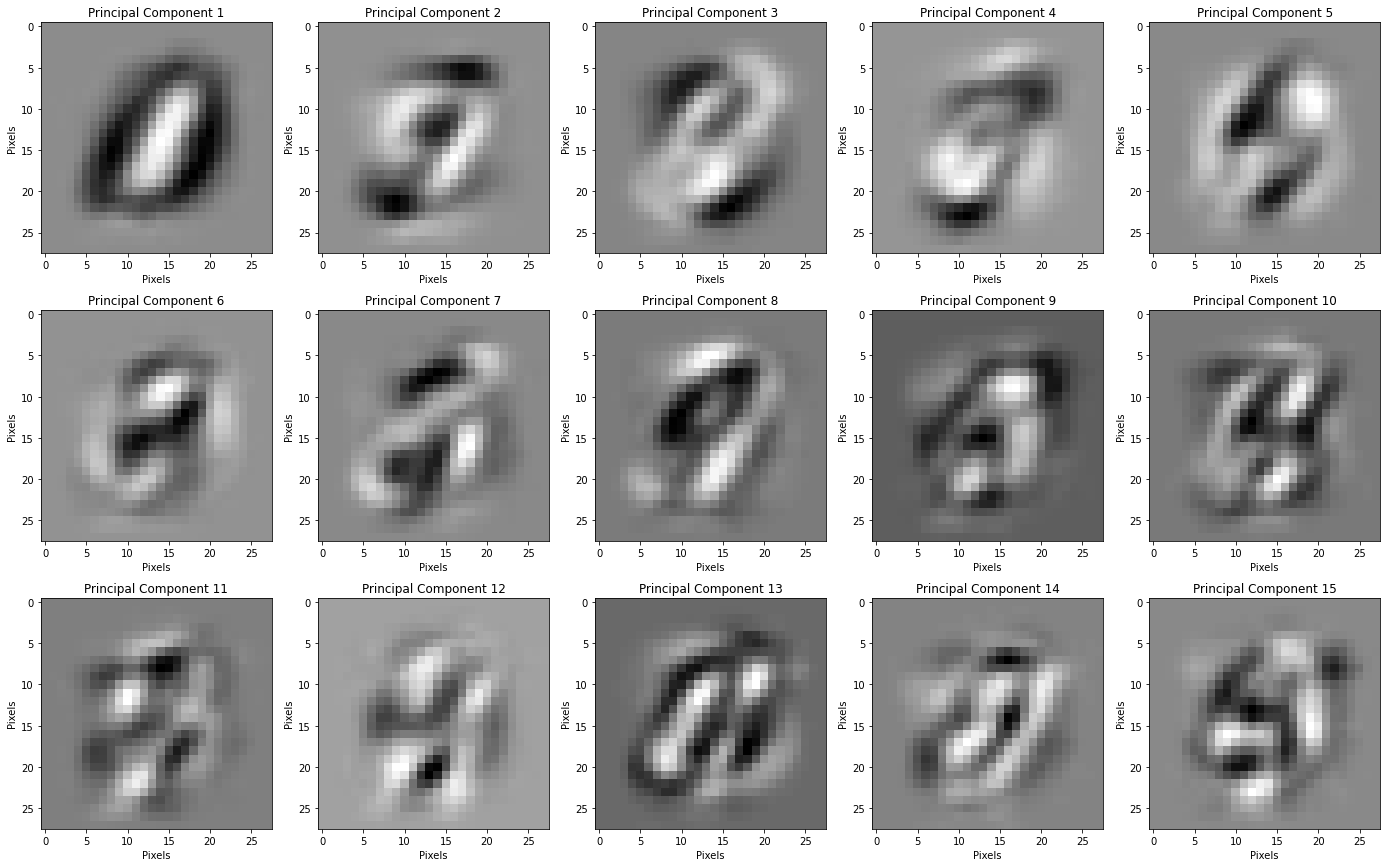

In [13]:
# first 15 eigenvectors
fig = plt.figure(figsize=(24,15))
for i in range(0,15):
  plt.subplot(3,5, i+1)
  plt.imshow(eigenVectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
  plt.xlabel("Pixels")
  plt.ylabel("Pixels")
  plt.title("Principal Component {}".format(i+1))

As expected, the image becomes noisier as number of principal components increase. This is because the high number of Principal Components try to capture more variance from the dataset.

Next, we will contruct a function that will that takes an argument 'n'. This function will:
1. plot a random image from the data set
2. plot n number of incremental plots that reconstructs the original image

In [19]:
def img_plot(n):
  # random plot of an image
  num = random.randrange(1000) # using random library to generate random number between 0 and 1000
  plt.gray() 
  plt.imshow(x[num].reshape(-1,28)) 
  plt.xlabel("Pixels")
  plt.ylabel("Pixels")
  plt.title("Label is {} at x[{}]".format(y[num],num))
  plt.show() 

  # incremental reconstruction
  for i in range(1,n+1):
    W = eigenVectors[:, 0:n]
    projX = np.dot(x[num].reshape(1,-1), W)
    ReconX = np.dot(projX, W.T).reshape(x[0].shape)
    plt.gray()
    plt.imshow(ReconX.reshape(-1,28)) # all incremental plots are plotted on 1 plot
    plt.xlabel("Pixels")
    plt.ylabel("Pixels")
    plt.title("Reconstructed image with first {} PC".format(n))
  plt.show()
  return

We will now try different 'n' values until we can find an optimal value that can help us humanly distinguish the digits.

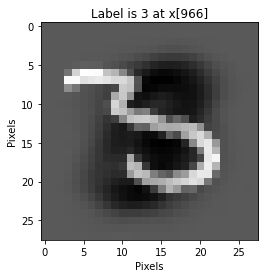

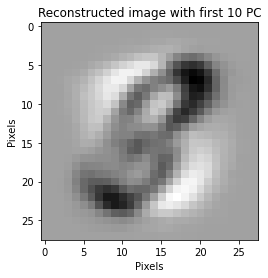

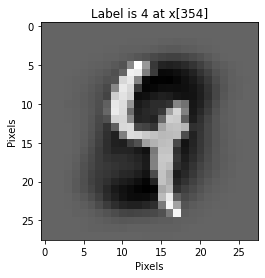

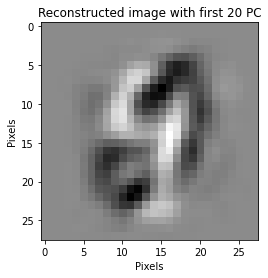

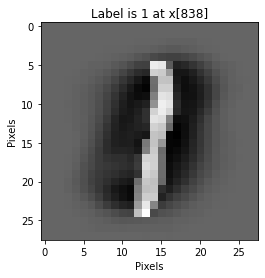

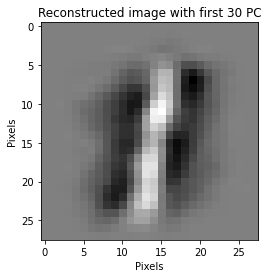

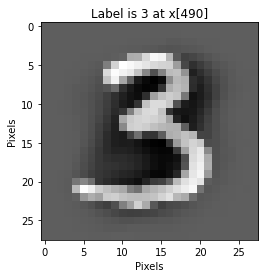

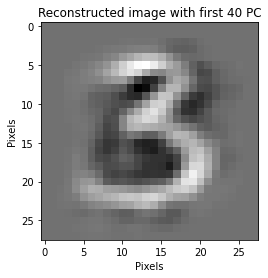

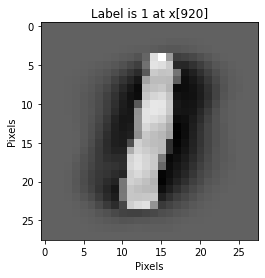

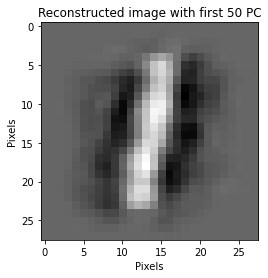

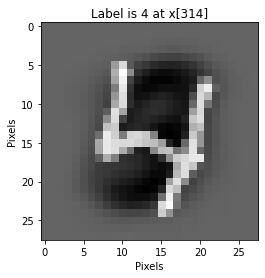

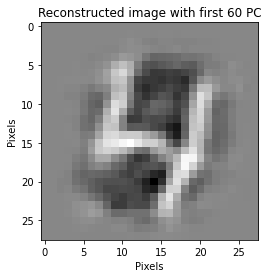

In [30]:
n = [10,20,30,40,50,60]
for i in n:
    img_plot(i) 

Looks like 40 is a good number of PC to use in this case.

### Compression Ratio

In [33]:
n = 40
tot_elements_orig =x.shape[0] * x.shape[1]
tot_elements_pca = (1000*n) + (784*n) # n=40 as defined in previous part
compression_ratio = tot_elements_orig/tot_elements_pca
print ("The compression ratio is {:.1f}".format(compression_ratio))

The compression ratio is 11.0


Based on the result above, we were able to compress our original dataset about 11 times after using PCA. 